# Assignment 1

### Due: Saturday, January 25 

For this assignment you will experiment with Python. NumPy, and Pandas in order to perform some basic data preprocessing and analysis tasks.

You will work with a modified subset of a real data set of customer for a bank. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document. You must only use Python, NumPy, Pandas, Matplotlib to perform the tasks for this assignment

#### Bank Data Description
 

The marketing department of a financial firm keeps records on customers, including demographic information and, number of type of accounts. When launching a new product, such as a "Personal Equity Plan" (PEP), a direct mail piece or a targeted email, advertising the product, is sent to existing customers, and a record kept as to whether that customer responded and bought the product. Based on this database of prior cases, the managers decide to use data mining techniques to build customer profile models in order to predict the behavior of future customers.

The data is contained in the file bank_data.csv. Each record is a customer description where the "pep" field indicates whether or not that customer has purchased a PEP. For classification problems, this field is used as the target attribute (with "YES" and "NO") as class labels.

##### The data contains the following fields

id:
    a unique identification number (categorical, str)
    
age:
    age of customer in years (numeric, int)
    
income:
    income of customer (numeric, float)
    
children:
    number of children (numeric, int)
    
gender:
    MALE / FEMALE
    
region:
    INNER_CITY/RURAL/SUBURBAN/TOWN
    
married:
    Customer married (YES/NO)
    
car:
    Customer owns one or more cars (YES/NO)
    
save_acct:
    Customer has a savings account (YES/NO)
    
current_acct:
    Customer has a current checking account (YES/NO)
    
mortgage:
    Customer have a mortgage (YES/NO)
    
pep:
    Customer purchased a PEP, Personal Equity Plan  (YES/NO)
    


In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("bank_data.csv")
df

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO


#### 1. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [3]:
df.describe(include="all")

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,600,600.000000,600.000000,600.000000,600,600,600,600,600,600,600,600
unique,600,NaN,NaN,NaN,2,4,2,2,2,2,2,2
top,ID12309,NaN,NaN,NaN,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,1,NaN,NaN,NaN,300,269,396,304,414,455,391,326
mean,NaN,42.395000,27524.031217,1.011667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,14.424947,12899.468246,1.056752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,5014.210000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,30.000000,17264.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,42.000000,24925.300000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,55.250000,36172.675000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [4]:
df_Yes= df.pep =='YES'
df[df_Yes].describe(include="all")

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,274,274.000000,274.000000,274.000000,274,274,274,274,274,274,274,274
unique,274,NaN,NaN,NaN,2,4,2,2,2,2,2,1
top,ID12509,NaN,NaN,NaN,MALE,INNER_CITY,YES,YES,YES,YES,NO,YES
freq,1,NaN,NaN,NaN,144,123,154,138,179,211,182,274
mean,NaN,45.127737,30644.919453,0.945255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,14.327991,13609.613043,0.860571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,7756.360000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,34.000000,19639.475000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,45.000000,28080.050000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,58.000000,38458.350000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_No = df.pep =='NO'
df[df_No].describe(include="all")

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
count,326,326.000000,326.000000,326.000000,326,326,326,326,326,326,326,326
unique,326,NaN,NaN,NaN,2,4,2,2,2,2,2,1
top,ID12309,NaN,NaN,NaN,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO
freq,1,NaN,NaN,NaN,170,146,242,168,235,244,209,326
mean,NaN,40.098160,24900.953374,1.067485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,14.123506,11661.123422,1.195524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,5014.210000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,27.000000,15366.475000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,40.000000,23105.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,51.000000,31210.900000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### With Personal Equity Plan

    Age: 
    Mean is around 45, and standard deviation is around 14.3,
    if the distribution is normal then in 95% confidence the range will cover form min to max 18 - 67.
    
    Income:
    Mean is 30644.91, and standard deviation is around 13609.613043	
    
    Children:
    Mean is close to 1 years old, and standard deviation is around 0.86
  
    Gender: male, 144 almost 53% in total so is really close. 
    Region: inner city, 123 almost 45% in total.
    Marred: Yes, 154 almost 56% in total.
    Car: Yes, 138 almost 50% in total.
    Saving Acct: Yes, 179 almost 65% in total.
    Current_acct: Yes, 211 almost 77% in total.
    Mortgage: No, 182 almost 66% in total.

### Without Personal Equity Plan
    
    Age: 
    Mean is around 40, and standard deviation is around 14.1,
    if the distribution is normal then in 95% confidence the range will cover form min to max 18 - 67.

    Income:
    Mean is 24900.95, and standard deviation is around 11661.12    

    Children:
    Mean is close to 1 years old, and standard deviation is around 1.12
  
    Gender: female, 170 almost 52% in total so is really close. 
    Region: inner city, 146 almost 45% in total.
    Marred: Yes, 242 almost 74% in total.
    Car: No, 168 almost 52% in total.
    Saving Acct: Yes, 235 almost 72% in total.
    Current_acct: Yes, 244 almost 75% in total.
    Mortgage: No, 209 almost 64% in total.

### conclusion

    Having or not having Personal Equity Plan has different on Income and age, others seems not have huge different.
    
    For the Income part, with plan person's mean income is 30644.91 and without plan person's mean income is 24900.95, so basically is around 5000 income difference.
    
    Moreverm, for the age, with plan person's mean age is 45 and without plan person's mean age is 40, so we can claim that over midage people might willing to buy the Personal Equity Plan.

#### 3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [6]:
df['income_z-score']=(df['income']-df['income'].mean())/df['income'].std()
df.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_z-score
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071


#### 4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [7]:
#inc_bins = pd.qcut(df.age, 3)
#inc_bins
age_bins = pd.qcut(df.age, 3, labels=["young", "mid-age", "old"])
df['age_bins']=age_bins
df.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_z-score,age_bins
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,old
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old


#### 5. Use Min-Max Normalization to transform the values of all numeric attributes  (income, age, children) in the original table (before the transforamtions in parts 3 and 4 above) onto the range 0.0-1.0.

In [8]:
attributes=['income','age','children']
for a in attributes:
    max=df[a].max()
    min=df[a].min()
    MinMax=(df[a]-min)/(max-min)
    df[a]=MinMax
df.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_z-score,age_bins
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,old
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old


#### 6. Convert the table (after normalization in part 5) into the standard spreadsheet format.

Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [9]:
####'married','car','savings_acct','current_acct','mortgage','pep'
binary_attribute=['married','car','savings_acct','current_acct','mortgage','pep']
for b in binary_attribute:
    binary=pd.Series(np.where(df[b].values == 'YES', 1, 0))
    df[b]=binary
    
####gender
g_binary=pd.Series(np.where(df['gender'].values == 'MALE', 1, 0))
df['gender']=g_binary

####'region','age_bins'
attribute=['region','age_bins']
for a in attribute:
    new_dummies=pd.get_dummies(df[a], prefix=a)
    df=pd.concat([df,new_dummies],axis=1)
    
df=df.drop(attribute, axis=1)
df.head()

,id,age,income,children,gender,married,car,savings_acct,current_acct,mortgage,pep,income_z-score,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,age_bins_young,age_bins_mid-age,age_bins_old
0,ID12101,0.612245,0.215634,0.333333,0,0,0,0,0,0,1,-0.773523,1,0,0,0,0,1,0
1,ID12102,0.448980,0.431395,1.000000,1,1,1,0,1,1,0,0.198541,0,0,0,1,0,1,0
2,ID12103,0.673469,0.198933,0.000000,0,1,1,1,1,0,0,-0.848766,1,0,0,0,0,0,1
3,ID12104,0.102041,0.264320,1.000000,0,1,0,0,1,0,0,-0.554180,0,0,0,1,1,0,0
4,ID12105,0.795918,0.783987,0.000000,0,1,0,1,0,0,0,1.787071,0,1,0,0,0,0,1


In [10]:
#Save this new table into a file called bank_numeric.csv
df.to_csv("bank_numeric.csv", float_format="%1.4f")
#read file
dfnum= pd.read_csv("bank_numeric.csv")
#drop ID
dfnum=df.drop(['id'], axis=1)
dfnum.head()

,age,income,children,gender,married,car,savings_acct,current_acct,mortgage,pep,income_z-score,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,age_bins_young,age_bins_mid-age,age_bins_old
0,0.612245,0.215634,0.333333,0,0,0,0,0,0,1,-0.773523,1,0,0,0,0,1,0
1,0.448980,0.431395,1.000000,1,1,1,0,1,1,0,0.198541,0,0,0,1,0,1,0
2,0.673469,0.198933,0.000000,0,1,1,1,1,0,0,-0.848766,1,0,0,0,0,0,1
3,0.102041,0.264320,1.000000,0,1,0,0,1,0,0,-0.554180,0,0,0,1,1,0,0
4,0.795918,0.783987,0.000000,0,1,0,1,0,0,0,1.787071,0,1,0,0,0,0,1


#### 7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. 

Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy].

In [11]:
dfnum.corr()

,age,income,children,gender,married,car,savings_acct,current_acct,mortgage,pep,income_z-score,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,age_bins_young,age_bins_mid-age,age_bins_old
age,1.000000,0.752726,0.023572,-0.090081,0.010394,0.077733,0.184389,-0.035312,-0.016154,0.173825,0.752726,-0.025171,0.018635,0.031345,-0.008510,-0.817337,0.005388,0.822813
income,0.752726,1.000000,0.036761,-0.023845,-0.008386,0.081556,0.266164,0.031616,-0.014662,0.221991,1.000000,-0.047564,0.084776,0.029824,-0.036431,-0.600078,-0.009788,0.617752
children,0.023572,0.036761,1.000000,-0.014206,-0.048716,0.036455,0.041536,0.006238,-0.074339,-0.057663,0.036761,-0.051222,0.089902,-0.014122,-0.007033,0.018426,-0.071814,0.052670
gender,-0.090081,-0.023845,-0.014206,1.000000,0.021110,0.006667,0.007207,-0.019466,0.066465,0.046843,-0.023845,0.023459,0.009092,0.010951,-0.040472,0.024487,0.074928,-0.099246
married,0.010394,-0.008386,-0.048716,0.021110,1.000000,-0.009571,0.028604,-0.059996,-0.021711,-0.189578,-0.008386,0.003254,-0.022649,0.012483,0.006369,-0.006942,-0.002862,0.009877
car,0.077733,0.081556,0.036455,0.006667,-0.009571,1.000000,0.034310,-0.034783,-0.007743,0.018917,0.081556,-0.018143,0.024006,-0.061184,0.041604,-0.070716,0.005614,0.066075
savings_acct,0.184389,0.266164,0.041536,0.007207,0.028604,0.034310,1.000000,0.042511,-0.001588,-0.072779,0.266164,-0.091373,0.036960,0.002605,0.068654,-0.122607,-0.039885,0.163854
current_acct,-0.035312,0.031616,0.006238,-0.019466,-0.059996,-0.034783,0.042511,1.000000,-0.036704,0.025141,0.031616,0.007894,-0.008496,0.038157,-0.027431,0.028668,-0.019656,-0.009522
mortgage,-0.016154,-0.014662,-0.074339,0.066465,-0.021711,-0.007743,-0.001588,-0.036704,1.000000,-0.024182,-0.014662,0.002098,-0.051908,0.004635,0.036591,0.016141,0.013268,-0.029535
pep,0.173825,0.221991,-0.057663,0.046843,-0.189578,0.018917,-0.072779,0.025141,-0.024182,1.000000,0.221991,0.001054,0.019714,0.062508,-0.059115,-0.122500,-0.022468,0.146442


### Analysis
    Age and income have 0.752726 correlaton, and in pep (Personal Equity Plan) the imcome might be the most significant correlation compare to other attribute. 

#### 8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot in notebook
plt.rcParams.update({'font.size': 16, 'figure.figsize': (8, 6)}) # set font and plot size to be larger
df= pd.read_csv("bank_data.csv")

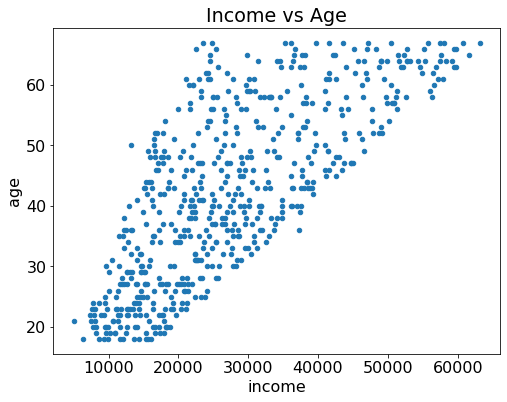

In [13]:
scatter_plot=df.plot(kind='scatter', x='income', y='age', title='Income vs Age');
scatter_plot

### Analysis
    In this sactter plot, we can one more prove that Income and age do have postive correlation, when the age become older, the income get more.

#### 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

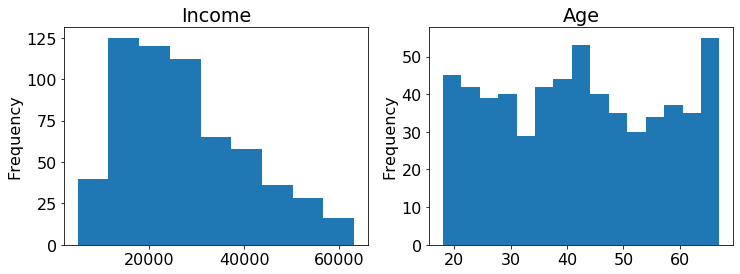

In [14]:
fig = plt.figure(figsize=(12, 4))
# Create an Axes object.

ax1 = fig.add_subplot(1,2,1)

df['income'].plot.hist(bins=9, title='Income');

ax2 = fig.add_subplot(1,2,2)

df['age'].plot.hist(bins=15, title='Age');

### Analysis
    The income distrubtion is an right skew distribution, so in futrue we can to transformation like log or collect more data to make it noraml distribution.
    For age distrubtion is Multimodal Distributions has three peak.

#### 10. Using a bargraph, plot the distribution of the values of the region attribute.

{'INNER_CITY': 268, 'TOWN': 172, 'RURAL': 95, 'SUBURBAN': 61}


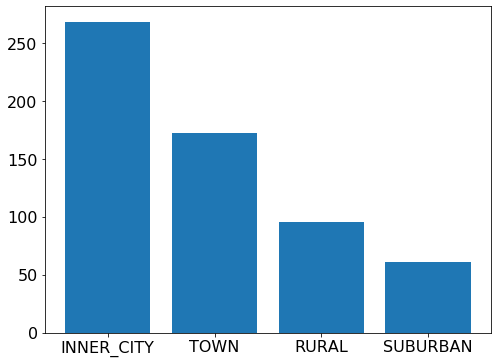

In [15]:
### transfer region column in to dic

region={}
for data in df['region']:
    if data in region:
        region[data]+=1
    else:
        region[data]=0
print(region)

##append then into two data
name=[]
value=[]
for a in region:
    name.append(a)
    value.append(region[a])
    
###graph##    
y_pos = np.arange(len(name)) 
# Create bars
plt.bar(y_pos, value)

# Create names on the x-axis
plt.xticks(y_pos, name)
 
# Show graphic
plt.show()
 

### Analysis

#### 11. Perform a cross-tabulation of the region attribute with the pep attribute. 

This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts.

[Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] 
Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

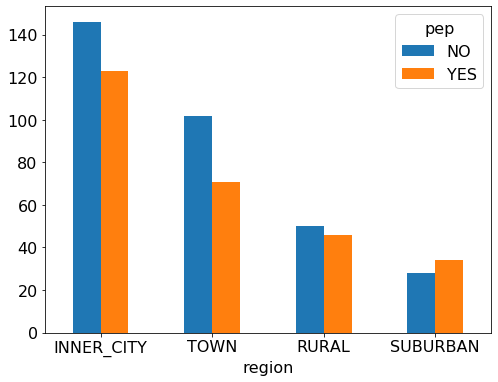

In [16]:
pep_region=pd.crosstab(df['region'],df['pep']).sort_values("YES", ascending=False)
pep_region_bar = pep_region.plot.bar(rot=0)

### Analysis

    In this bar plot, the most interesting part is that people who live in suburban have the Personal Equity Plan more than the people without, which is different result than other three catagory in region column. 